In [1]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [2]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [3]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [4]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B1870730562'

In [5]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [7]:
temp_p = book_soup.select('#tabs_1 > div > p')
len(temp_p)

11

In [8]:
ptag_list = []
for a in temp_p:
    ptag_list.append(a.get_text().strip())
print(ptag_list)

['실용영어와 입시영어 사이에서 불안을 끊고 확신을 얻는 법', '하버드대 교육심리 전문가가 알려주는 영어 완전학습 로드맵', '12년 영어를 끌고 갈 힘을 키우는 법을 낱낱이 알려드립니다', '', '2024학년도 수능 영어 1등급 비율은 4.7퍼센트이다. 그런데 대치동에서는 3명 중 1명이 수능 영어 1등급을 받는다. 어떻게 이렇게 압도적인 차이를 끌어내는 걸까? 그 해답을 책에 담았다.', '먼저 수십 년간 대치동에서 살아남은, 효율성이 증명된 영어 학습법 추린 후 내 아이에게 어떻게 적용해야 할지 알려준다. 다음으로 어휘, 문법, 구문, 독해, 영작, 듣기, 말하기 영역별로 어떻게 접근해야 하는지 하나하나 짚어준다. 올바른 공부법과 잘못된 공부법, 영역별 추천 교재와 영상, 실력을 쌓고 확인할 수 있는 효과적인 훈련법/평가법/오답정리법까지 세세하게 담았다.', '실용영어와 입시영어 사이에서 갈피를 잡지 못해 흔들리는 부모를 위해 초등/중등/고등 영어가 어떻게 다른지, 내신과 수능에서 모두 1등급을 받기 위해 미취학, 초1~4, 초5~중2, 중3, 고등학생 시기에 무엇에 집중해야 하는지도 살펴본다. 시기마다 고민되는 학원 이용하기도 상세하게 다룬다. 학원은 어떻게 아이의 학습을 돕는지, 학원은 언제 다녀야 하는지, 시기별로 어떤 유형의 학원이 필요한지, 정말 좋은 학원은 어떻게 고를 수 있는지, 학원을 다니더라도 따로 챙겨야 할 것 등을 살펴본다.', '마지막으로 영어를 잘할 수 있도록 돕는 공부 습관과 못하도록 막는 공부 습관을 최신 연구 결과를 토대로 짚어본다. 교육심리학적·언어학적 분석까지 더해진 책이라 부모들에게 가장 확실한 영어 학습의 지침이 될 것이다.', '', '', '']


In [10]:
# 5페이지만 크롤링
ptag_list = []
for page in tqdm(range(1, 5)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser') 
    lis = soup.select('.sub_book_list')
    anwser = ''
    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        temp_p = book_soup.select('#tabs_1 > div > p')
        for p in temp_p:
            text = p.get_text().strip()
            print(text)
            anwser += text + '\n'
    ptag_list.append(anwser)
    

  0%|          | 0/4 [00:00<?, ?it/s]

실용영어와 입시영어 사이에서 불안을 끊고 확신을 얻는 법
하버드대 교육심리 전문가가 알려주는 영어 완전학습 로드맵
12년 영어를 끌고 갈 힘을 키우는 법을 낱낱이 알려드립니다

2024학년도 수능 영어 1등급 비율은 4.7퍼센트이다. 그런데 대치동에서는 3명 중 1명이 수능 영어 1등급을 받는다. 어떻게 이렇게 압도적인 차이를 끌어내는 걸까? 그 해답을 책에 담았다.
먼저 수십 년간 대치동에서 살아남은, 효율성이 증명된 영어 학습법 추린 후 내 아이에게 어떻게 적용해야 할지 알려준다. 다음으로 어휘, 문법, 구문, 독해, 영작, 듣기, 말하기 영역별로 어떻게 접근해야 하는지 하나하나 짚어준다. 올바른 공부법과 잘못된 공부법, 영역별 추천 교재와 영상, 실력을 쌓고 확인할 수 있는 효과적인 훈련법/평가법/오답정리법까지 세세하게 담았다.
실용영어와 입시영어 사이에서 갈피를 잡지 못해 흔들리는 부모를 위해 초등/중등/고등 영어가 어떻게 다른지, 내신과 수능에서 모두 1등급을 받기 위해 미취학, 초1~4, 초5~중2, 중3, 고등학생 시기에 무엇에 집중해야 하는지도 살펴본다. 시기마다 고민되는 학원 이용하기도 상세하게 다룬다. 학원은 어떻게 아이의 학습을 돕는지, 학원은 언제 다녀야 하는지, 시기별로 어떤 유형의 학원이 필요한지, 정말 좋은 학원은 어떻게 고를 수 있는지, 학원을 다니더라도 따로 챙겨야 할 것 등을 살펴본다.
마지막으로 영어를 잘할 수 있도록 돕는 공부 습관과 못하도록 막는 공부 습관을 최신 연구 결과를 토대로 짚어본다. 교육심리학적·언어학적 분석까지 더해진 책이라 부모들에게 가장 확실한 영어 학습의 지침이 될 것이다.



이 책은 여러분보다 조금 앞서 개발자가 된 선배가 전하는 커리어 가이드입니다. 취업의 첫 단추부터 네트워크 형성, 효과적인 프로그래밍 학습과 피드백 요청 방법 그리고 커리어 관리까지 ‘요즘 개발자’라면 누구나 고민하는 주제에 대한 현실적인 솔루션을 안내합니다. 또한 이 책은 여러분이 ‘나다운’ 개발자로 성장하는 데 초점을 맞춥니다

In [11]:
len(ptag_list)

4

In [12]:
with open('한빛책소개.txt', 'w', encoding='utf-8') as file:
    for answer in ptag_list:
        file.write(answer + '\n')

# 텍스트 전처리


In [32]:
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [46]:
with open('한빛책소개.txt', encoding='utf-8') as file:
    text = file.read()

In [47]:
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['실용', '영어', '입시', '영어', '사이', '불안', '확신', '법', '하버드대', '교육']

In [48]:
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)
    if item:
       new_tokens.append(item)

In [49]:
import nltk
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

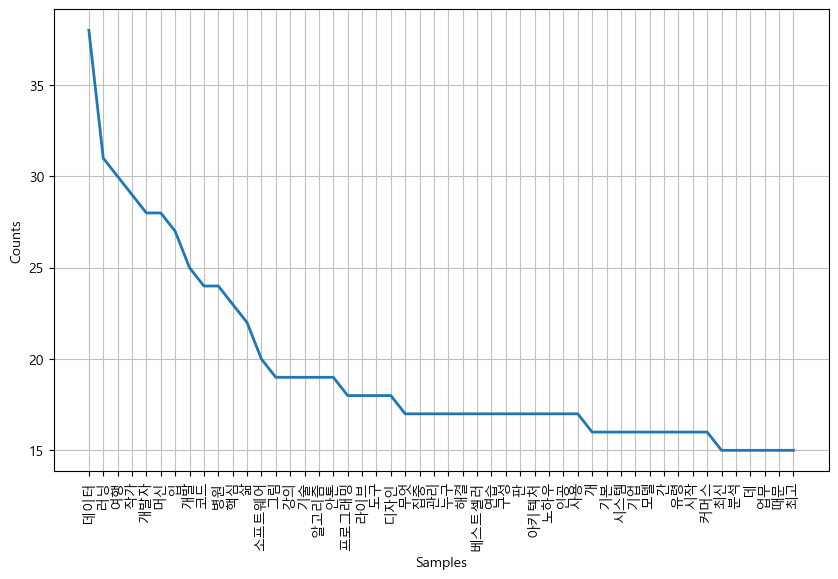

In [58]:
# 불용어 제거후 반복수행 
book_trand = nltk.Text(new_tokens, name='책 트렌드')
plt.figure(figsize=(10, 6))
book_trand.plot(50)
plt.show()

In [56]:
stoptext = ''' 
그 이 것 수 법 또한 책 이 것 위 그 의 대한 소개 우리 위해 가장 제공 를 자신 모든 내용 이해 실습 경험 세계
등 통해 개념 학습 문제 이야기 설명 시간 시리즈 때 권 선생님 내 하나 및 전 나 거 실제
과정 지금 실무 지식 지능 말 사람 활용 방법 저자 일 
'''

In [57]:
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]
# 위 불용어 확인하기 위한 그래프 다시 실행할 것

['실용', '영어', '입시', '영어', '사이', '불안', '확신', '하버드대', '교육', '심리']

# 워드크라우드 만들기

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
font_path='C:/Windows/Fonts/malgun.ttf'

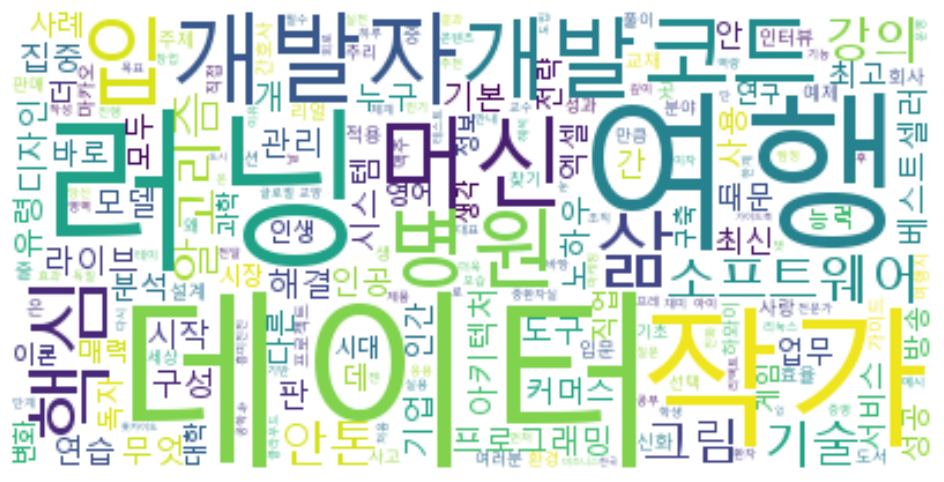

In [61]:
wc = WordCloud(
    background_color='white',
    font_path='C:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(book_trand.vocab().most_common(300)))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()